### Introduction

Here, we visualize the data to get a better sense of the taxis across Singapore in temporal and spatial terms (e.g. over days/ hours/ sector grids). As we are going to be plotting time series data, getting the index as a date time object would be needed, so we parse the relevant column with datetime information as date during data loading.

In [1]:
# Step 1: Import your libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-whitegrid')
plt.rc('figure', figsize=(15,5), titlesize=16, titleweight='bold')
plt.rc('axes', titlesize=16, titleweight='bold', titlepad=10,
       labelsize=14, labelweight='bold')
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

In [27]:
# load data; parse date col
date_col = ['time']
df = pd.read_csv('use.csv', parse_dates=date_col, index_col=date_col)
df.drop('Unnamed: 0',axis=1, inplace=True)
df.head(1)

,properties.taxi_count,day_of_week,minute,hour,sector_1,sector_2,sector_3,sector_4,sector_5,sector_6,sector_7,sector_8,sector_9
time,,,,,,,,,,,,,
2022-04-01,2434,4,0,0,127,793,0,291,1217,0,0,6,0


### Taxi count
See how taxi count varies over the month

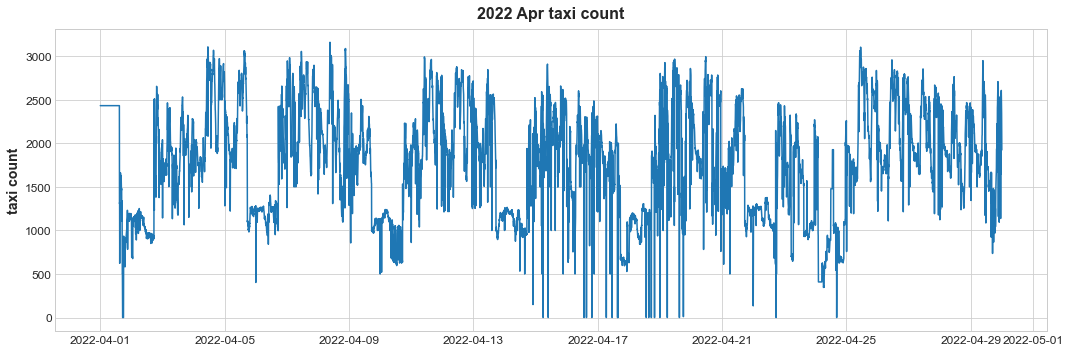

In [29]:
# line plot properties.taxi_count vs time
# func for matplotlib line plot
def mline(col, ylabel, title):
    plt.plot( col)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.tight_layout()
    plt.show()
mline(df['properties.taxi_count'], 'taxi count', '2022 Apr taxi count')

There are data points where the taxi count is 0, which could either be a case of system down time? Let's check it out.

In [37]:
# check for patterns in time index where tai counts are 0
df.loc[df['properties.taxi_count']==0].index

DatetimeIndex(['2022-04-01 17:10:00', '2022-04-01 17:15:00',
               '2022-04-01 17:20:00', '2022-04-01 17:25:00',
               '2022-04-01 17:30:00', '2022-04-01 17:35:00',
               '2022-04-01 17:40:00', '2022-04-01 17:45:00',
               '2022-04-01 17:50:00', '2022-04-01 17:55:00',
               '2022-04-15 05:55:00', '2022-04-15 09:50:00',
               '2022-04-16 13:30:00', '2022-04-16 15:20:00',
               '2022-04-16 19:30:00', '2022-04-17 06:40:00',
               '2022-04-17 11:10:00', '2022-04-17 15:20:00',
               '2022-04-17 15:40:00', '2022-04-18 13:30:00',
               '2022-04-18 15:25:00', '2022-04-18 17:25:00',
               '2022-04-18 19:45:00', '2022-04-18 19:50:00',
               '2022-04-18 19:55:00', '2022-04-19 00:00:00',
               '2022-04-19 05:45:00', '2022-04-19 15:05:00',
               '2022-04-22 17:45:00', '2022-04-24 16:30:00'],
              dtype='datetime64[ns]', name='time', freq=None)

In [36]:
# pick a sample and check neighboring taxi counts
df.loc[['2022-04-01 17:05:00', '2022-04-01 17:10:00']]

,properties.taxi_count,day_of_week,minute,hour,sector_1,sector_2,sector_3,sector_4,sector_5,sector_6,sector_7,sector_8,sector_9
time,,,,,,,,,,,,,
2022-04-01 17:05:00,508,4,5,17,25,123,0,43,314,0,1,2,0
2022-04-01 17:10:00,0,4,10,17,0,0,0,0,0,0,0,0,0


Checking the neighboring data points, we see the sudden drop in taxi count in the span of 5 mins. For simplicity, we remove these records where taxi count is 0.

In [38]:
# drop rows where taxi_count 0
df = df[df['properties.taxi_count']!=0]
df.shape

(8323, 13)

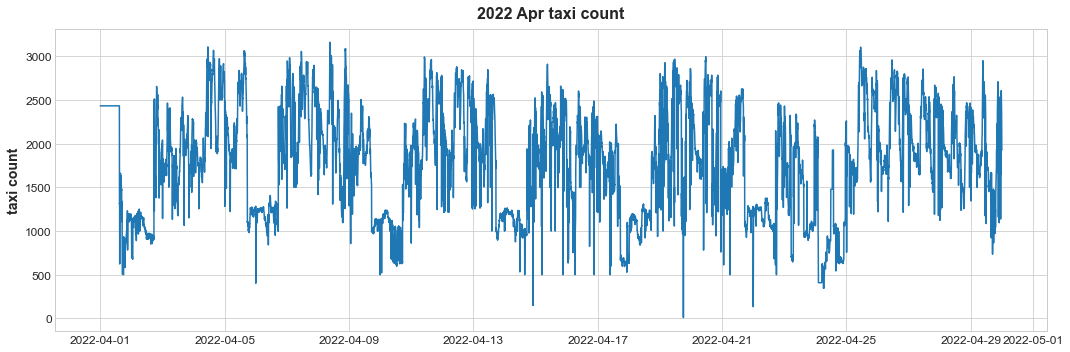

In [39]:
# replot
mline(df['properties.taxi_count'], 'taxi count', '2022 Apr taxi count')

In [52]:
# number of taxis on day with least taxis
df.loc[df['properties.taxi_count'] == df['properties.taxi_count'].min()]

,properties.taxi_count,day_of_week,minute,hour,sector_1,sector_2,sector_3,sector_4,sector_5,sector_6,sector_7,sector_8,sector_9
time,,,,,,,,,,,,,
2022-04-19 18:10:00,10,1,10,18,0,5,0,1,4,0,0,0,0


Only 10 taxis on the road on day with least number of taxis, around 6p.m., but it should peak with evening rush hour? Let's check out taxis 1 hour later (i.e. around 7p.m.) on the same day.

In [55]:
df.loc[['2022-04-19 19:10:00']]

,properties.taxi_count,day_of_week,minute,hour,sector_1,sector_2,sector_3,sector_4,sector_5,sector_6,sector_7,sector_8,sector_9
time,,,,,,,,,,,,,
2022-04-19 19:10:00,1556,1,10,19,72,502,0,166,809,0,0,7,0


### Visualising taxi count by day

In [56]:
# resample by day, and use the day's median value
df_resample = df.resample('1D').median()
df_resample

,properties.taxi_count,day_of_week,minute,hour,sector_1,sector_2,sector_3,sector_4,sector_5,sector_6,sector_7,sector_8,sector_9
time,,,,,,,,,,,,,
2022-04-01,2434.0,4.0,25.0,11.0,127.0,793.0,0.0,291.0,1217.0,0.0,0.0,6.0,0.0
2022-04-02,1141.0,5.0,27.5,11.5,54.0,450.0,0.0,126.5,512.5,0.0,0.0,3.0,0.0
2022-04-03,1875.5,6.0,27.5,11.5,90.0,581.5,0.0,239.0,950.5,0.0,0.0,8.0,0.0
2022-04-04,2276.5,0.0,27.5,11.5,100.0,645.0,0.0,295.5,1254.0,0.0,0.0,7.0,0.0
2022-04-05,2017.5,1.0,27.5,11.5,79.0,559.5,0.0,241.0,1029.5,0.0,0.0,6.0,0.0
2022-04-06,1253.0,2.0,27.5,11.5,63.0,519.0,0.0,137.0,669.0,0.0,0.0,4.0,0.0
2022-04-07,2536.5,3.0,27.5,11.5,102.0,677.5,0.0,283.5,1354.0,0.0,0.0,8.0,0.0
2022-04-08,2180.5,4.0,27.5,11.5,90.0,632.5,0.0,241.5,1210.5,0.0,0.0,7.5,0.0
2022-04-09,1804.5,5.0,27.5,11.5,74.0,536.5,0.0,196.0,850.5,0.0,0.0,5.0,0.0


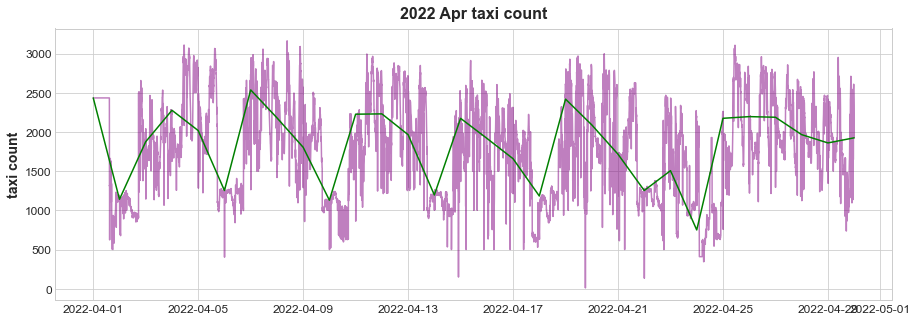

In [57]:
# plot resampled DataFrame over original plot
def mline_compare(col1, col2, ylabel, title):
    plt.plot(col1, color='purple', alpha=0.5),
    plt.plot(col2, color='green')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()
mline_compare(df['properties.taxi_count'], 
              df_resample['properties.taxi_count'],
              'taxi count',
              '2022 Apr taxi count')

It appears there is a cyclical pattern on taxi count over the month. How about the sectors? We'll plot in 3 x 1 grid arrangement per the original defined Singapore sector grid. (i.e. would imagine 3x3 grid results in too squished an overall graph)

In [58]:
sectorlistA = ['sector_1', 'sector_4', 'sector_7']
sectorlistB = ['sector_2', 'sector_5', 'sector_8']
sectorlistC = ['sector_3', 'sector_6', 'sector_9']

In [59]:
def gridplot(frame1, frame2, sectorlist):
    fig, ax = plt.subplots(3, 1, sharex='col', sharey='row', figsize=(12,12))
    for i in range(0, 3):
        ax[i].plot(frame1.index, frame1[sectorlist[i]], color='purple', alpha=0.5)
        ax[i].plot(frame2.index, frame2[sectorlist[i]], color='green')
        ax[i].set_title(f'{sectorlist[i]}', fontsize=14)
plt.show()


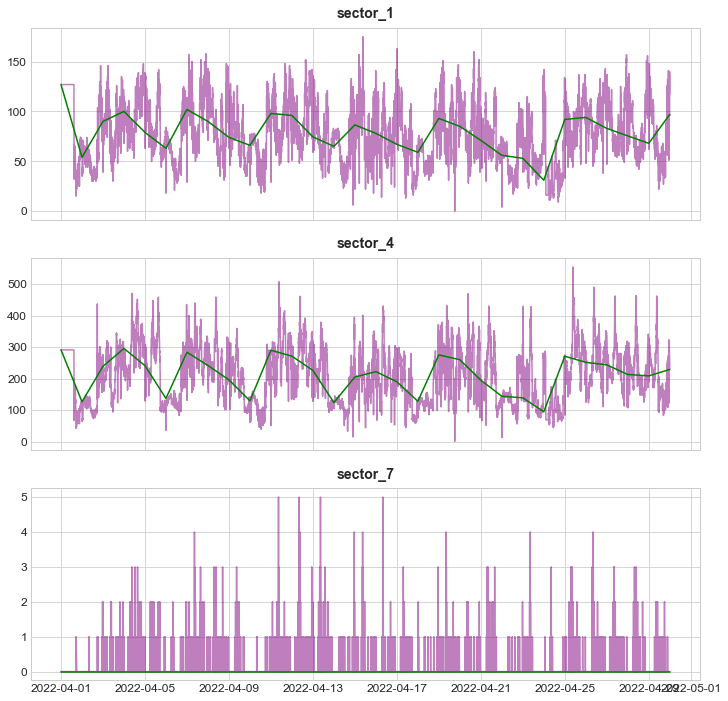

In [60]:
# Sectors 1,4,7
gridplot(df, df_resample, sectorlistA)

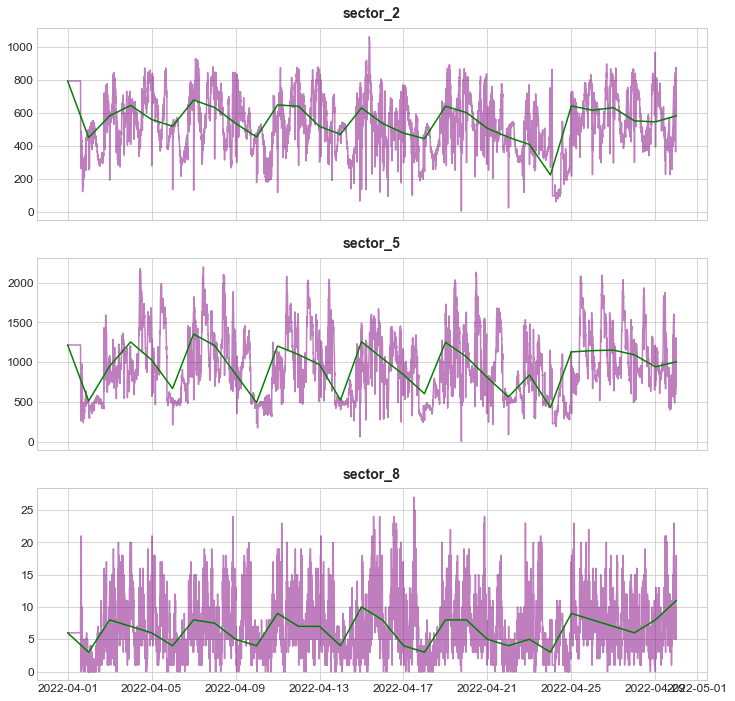

In [61]:
# Sectors 2,5,8
gridplot(df, df_resample, sectorlistB)

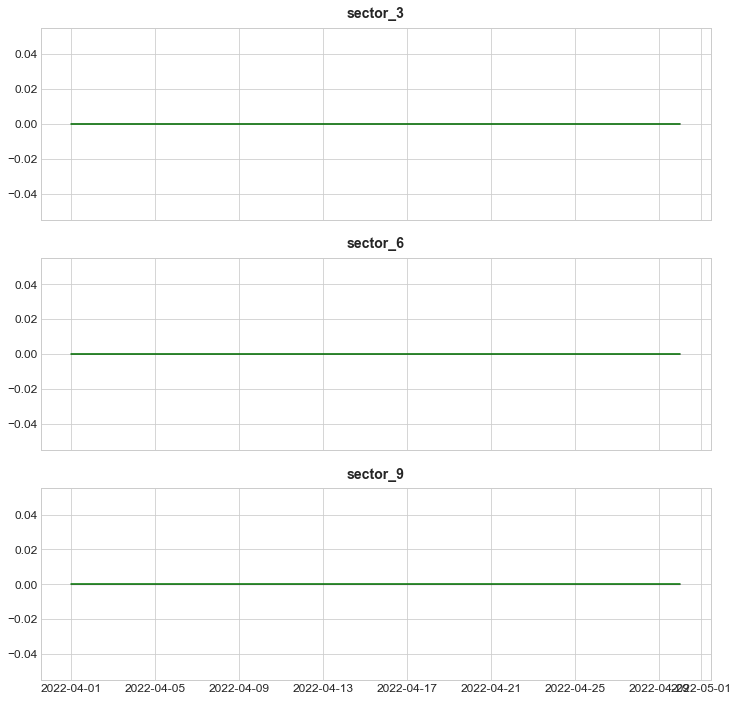

In [62]:
# Sectors 3,6,9
gridplot(df, df_resample, sectorlistC)

No taxi counts in sectors 3,6,9,7. For the rest of the sectors, the cyclical nature is also reflected... interesting. In generally, the highest concentration of taxis are in sector 5, followed by sector 2 and 4. Sector 5 happens to be the central region of the 3x3 region grid, covering areas from the Central Business District to well-established neighborhoods such as Bishan.

### Visualising average taxi count by hour

In [63]:
# Group by hour and average taxi counts
df_houravg = df.groupby(by='hour', as_index=False).mean()
df_houravg

,hour,properties.taxi_count,day_of_week,minute,sector_1,sector_2,sector_3,sector_4,sector_5,sector_6,sector_7,sector_8,sector_9
0,0,1820.580460,3.045977,27.500000,90.839080,582.195402,0.0,216.387931,923.741379,0.0,0.051724,7.364943,0.0
1,1,1832.758621,3.034483,27.500000,94.431034,628.560345,0.0,215.060345,887.635057,0.0,0.037356,7.034483,0.0
2,2,1817.488506,3.034483,27.500000,91.502874,630.646552,0.0,211.997126,876.497126,0.0,0.031609,6.813218,0.0
3,3,1670.850575,3.034483,27.500000,84.399425,599.114943,0.0,199.652299,780.362069,0.0,0.031609,7.290230,0.0
4,4,1700.658046,3.034483,27.500000,89.155172,621.137931,0.0,200.396552,783.537356,0.0,0.045977,6.385057,0.0
5,5,1717.601156,3.037572,27.369942,94.430636,619.283237,0.0,205.803468,792.817919,0.0,0.011561,5.254335,0.0
6,6,1546.198847,3.025937,27.463977,74.778098,547.596542,0.0,182.570605,737.302594,0.0,0.135447,3.815562,0.0
7,7,1647.178161,3.034483,27.500000,71.281609,532.347701,0.0,218.758621,820.448276,0.0,0.502874,3.839080,0.0
8,8,1657.666667,3.034483,27.500000,68.439655,499.560345,0.0,268.310345,816.020115,0.0,0.790230,4.545977,0.0
9,9,1968.155620,3.031700,27.435159,69.397695,470.668588,0.0,303.365994,1117.884726,0.0,0.414986,6.423631,0.0


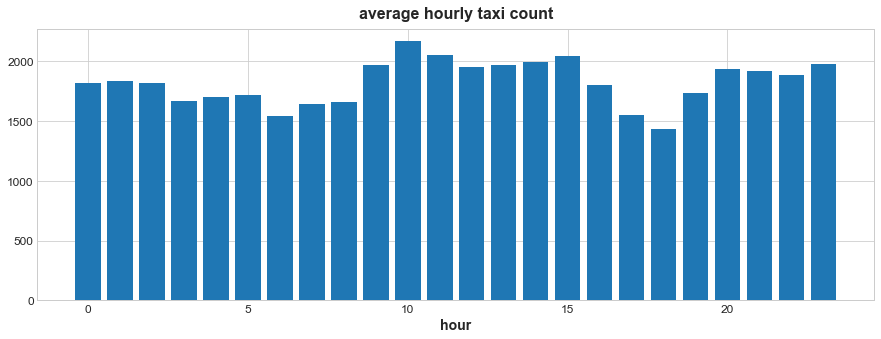

In [65]:
# plot the hourly average of 'properties.taxi_count'
plt.bar(height=df_houravg['properties.taxi_count'], x=df_houravg['hour'])
plt.title('average hourly taxi count')
plt.xlabel('hour')
plt.show()

In [66]:
# for sectors 1-9
def gridbar(frame1, sectorlist):
    fig, ax = plt.subplots(3, 1, sharex='col', sharey='row', figsize=(12,12))
    for i in range(0, 3):
        ax[i].bar(frame1.index, frame1[sectorlist[i]], color='purple', alpha=0.5)
        ax[i].set_title(f'{sectorlist[i]}', fontsize=14)
plt.show()

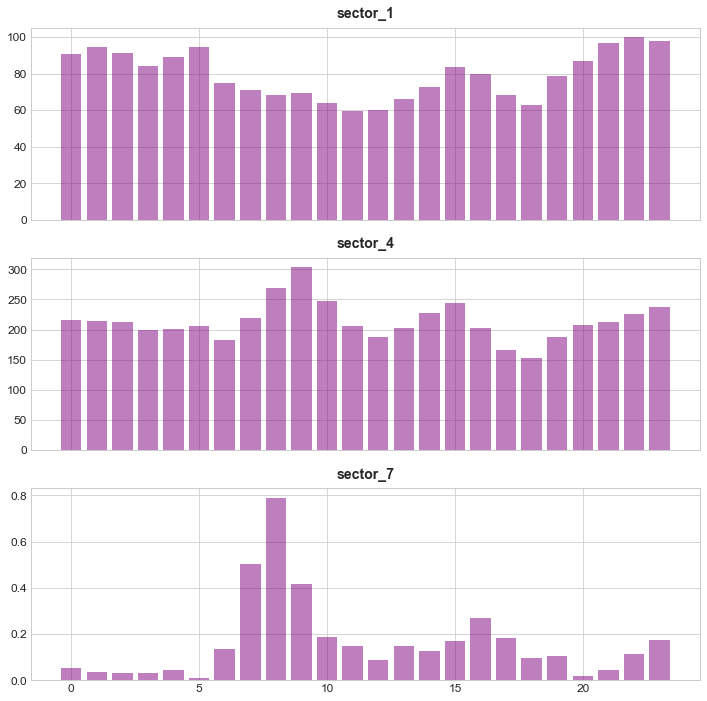

In [67]:
# sectors 1,4,7
gridbar(df_houravg, sectorlistA)

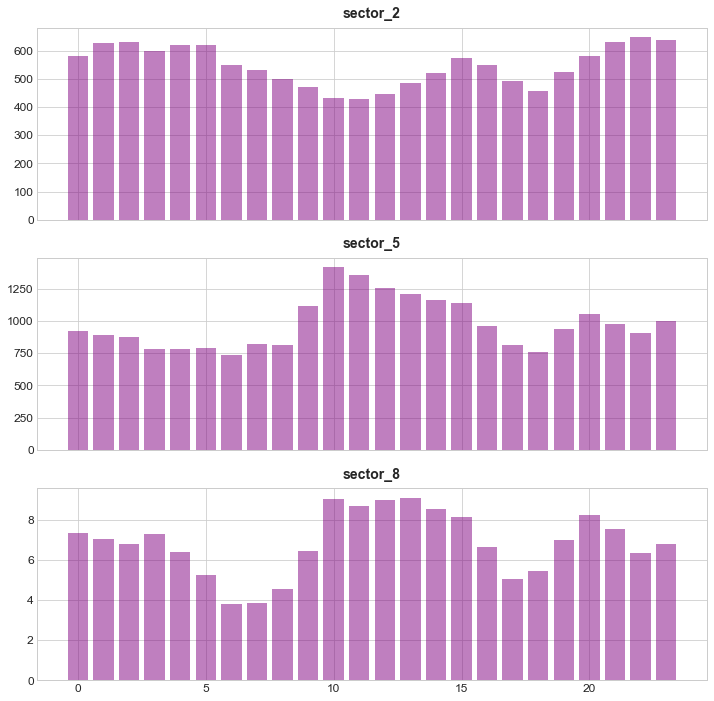

In [68]:
# sectors 2,5,8
gridbar(df_houravg, sectorlistB)

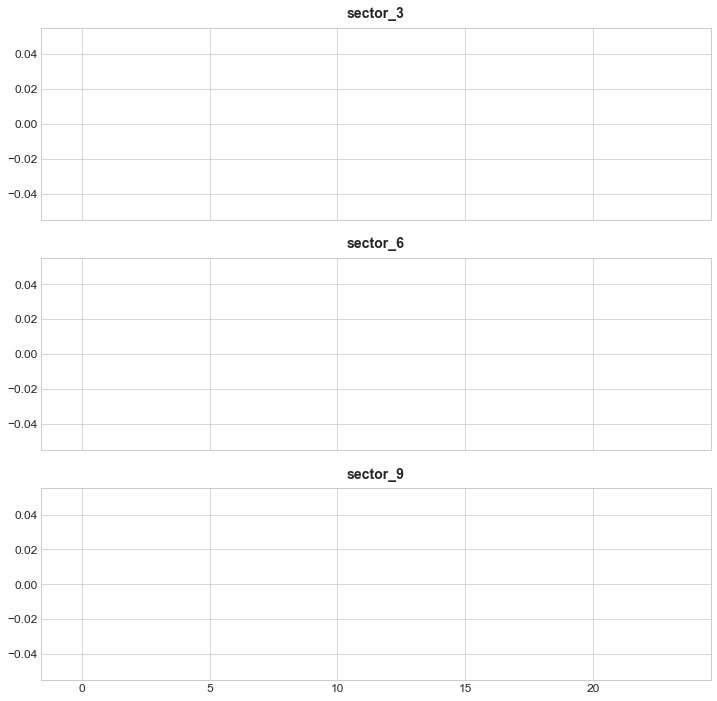

In [69]:
# sectors 3,6,9
gridbar(df_houravg, sectorlistC)

Interesing that the taxi count for sectors 1 & 2 are different from the rest (peak generally near 10am)

### Visualising average taxi count by day of week

In [70]:
# group by day of week, average taxi count
df_dowavg = df.groupby(by='day_of_week', as_index=False).mean()
df_dowavg

,day_of_week,properties.taxi_count,minute,hour,sector_1,sector_2,sector_3,sector_4,sector_5,sector_6,sector_7,sector_8,sector_9
0,0,2017.262653,27.443281,11.471204,87.664049,586.658813,0.0,253.786213,1081.363002,0.0,0.221640,7.568935,0.0
1,1,2146.193211,27.528285,11.512620,92.429939,618.852045,0.0,257.359443,1169.413403,0.0,0.215840,7.922541,0.0
2,2,1884.276910,27.500000,11.500000,79.874132,563.956597,0.0,219.640625,1013.763889,0.0,0.198785,6.842882,0.0
3,3,1853.801215,27.500000,11.500000,80.756076,554.748264,0.0,212.210938,999.735243,0.0,0.204861,6.145833,0.0
4,4,1912.606167,27.417659,11.463910,81.640505,580.398739,0.0,209.543097,1033.651016,0.0,0.113525,7.259285,0.0
5,5,1567.557391,27.478261,11.479130,67.371304,487.021739,0.0,180.343478,826.364348,0.0,0.120870,6.335652,0.0
6,6,1377.329555,27.497820,11.495205,65.722755,431.100262,0.0,165.337402,709.324324,0.0,0.083697,5.761116,0.0


### Note: 
Monday is indexed as 0, Sunday as 6 for day of week

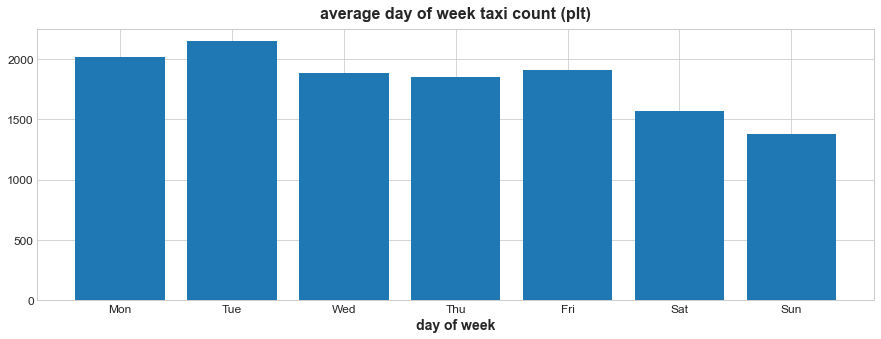

In [71]:
# plot day of week average for properties.taxi_count
plt.bar(height=df_dowavg['properties.taxi_count'], x=df_dowavg['day_of_week'])
plt.title('average day of week taxi count (plt)')
plt.xlabel('day of week')
xticklabels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.xticks(df_dowavg['day_of_week'], xticklabels, )
plt.show()

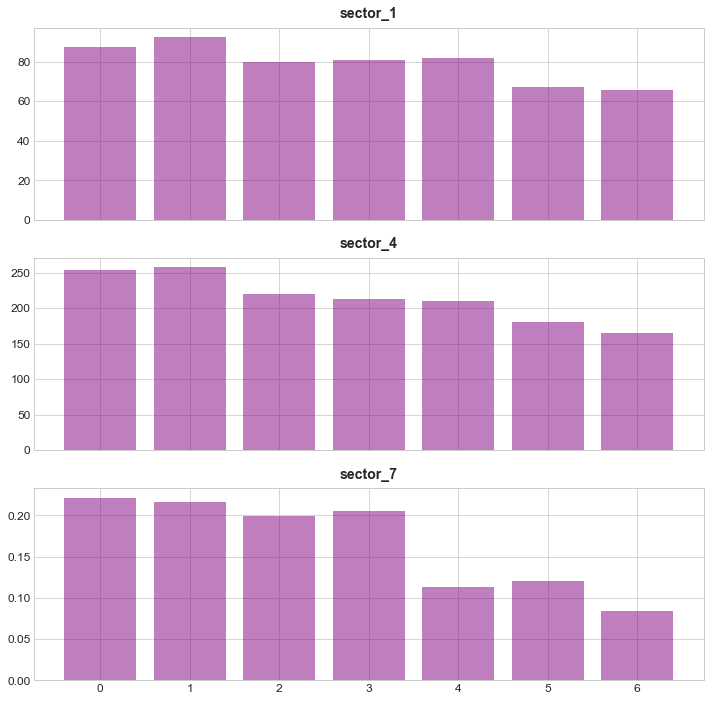

In [72]:
# sectors 1,4,7
gridbar(df_dowavg, sectorlistA)

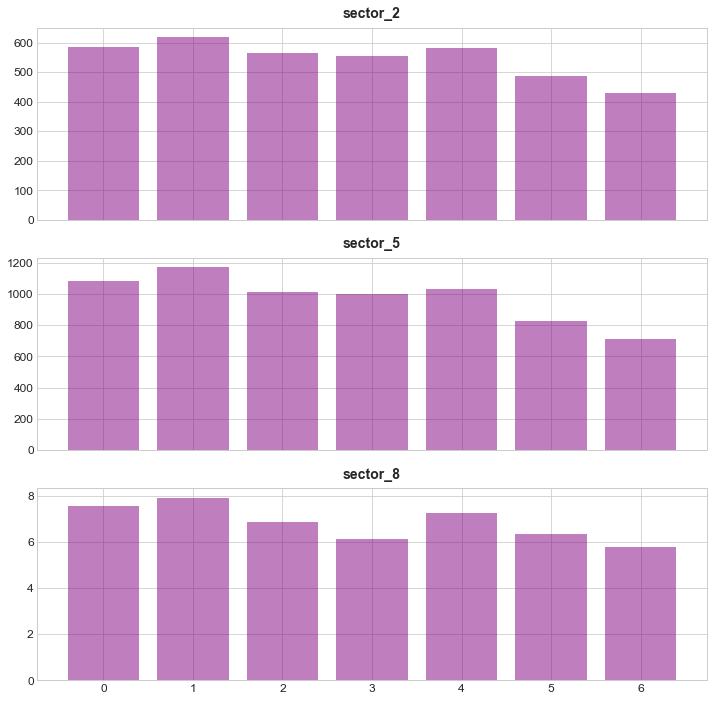

In [73]:
# sectors 2,5,7
gridbar(df_dowavg, sectorlistB)

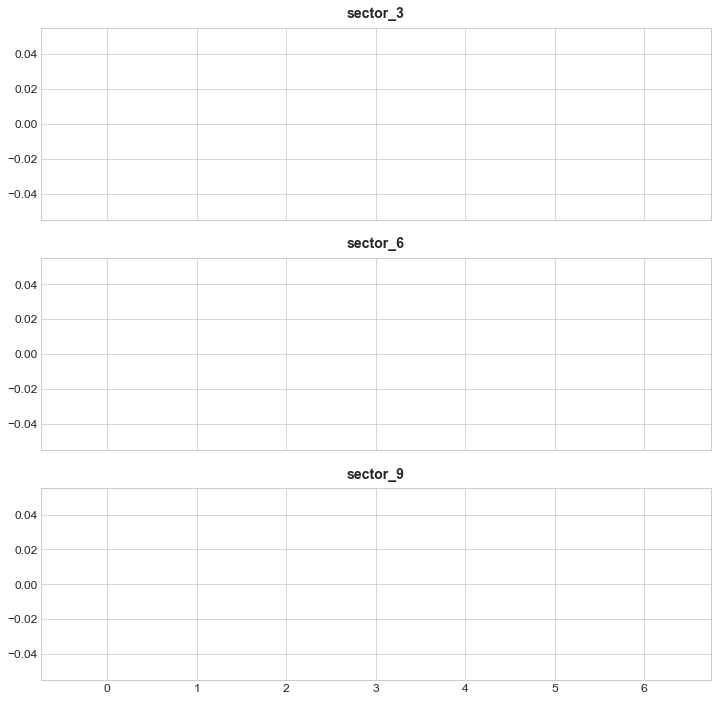

In [74]:
# sectors 3,6,9
gridbar(df_dowavg, sectorlistC)

For some reason, Tues generally has a higher number of taxis on the road.

### Remove columns with 0 taxi counts

In [76]:
# remove the relevant sector columns from the DataFrame
cols_drop = ['sector_3', 'sector_6', 'sector_7', 'sector_9']
df_use = df.drop(cols_drop, axis=1).copy()

In [77]:
# export as CSV
df_use.to_csv('use_cleaned.csv')